# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# 1.Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
# mount google drive in to your Colab enviornment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


# 2.Importing Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models,layers

In [45]:
concrete_data = pd.read_csv('compresive_strength_concrete.csv')
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [46]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [47]:
concrete_data['Age (day)']=concrete_data.select_dtypes('int64').astype('float64')
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   float64
 8   Concrete compressive strength(MPa, megapascals)  

In [48]:
req_col_names = ["Cement", "Blast_Furnance_Slag", "Fly_Ash", "Water", "Super_Plasticizer",
                 "Coarse_Aggregate", "Fine_Aggregate", "Age", "Concrete_Strength"]
curr_col_names = list(concrete_data.columns)
curr_col_names
mapper = {}
for i,name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]
  
    
concrete_data = concrete_data.rename(columns = mapper)

In [49]:
concrete_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30


Check Missing Values ( If Exist ; Fill each record with mean of its feature )

Standardized the Input Variables. Hint: Centeralized the data

In [50]:
concrete_data.isna().sum()

Cement                 0
Blast_Furnance_Slag    0
Fly_Ash                0
Water                  0
Super_Plasticizer      0
Coarse_Aggregate       0
Fine_Aggregate         0
Age                    0
Concrete_Strength      0
dtype: int64

In [51]:
concrete_data.describe()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [52]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   Blast_Furnance_Slag  1030 non-null   float64
 2   Fly_Ash              1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Super_Plasticizer    1030 non-null   float64
 5   Coarse_Aggregate     1030 non-null   float64
 6   Fine_Aggregate       1030 non-null   float64
 7   Age                  1030 non-null   float64
 8   Concrete_Strength    1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


# 3.Split Data according to Task

Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [ ]:
test_val=(30/100)*len(concrete_data)
train_val=(50/100)*len(concrete_data)
val_val=(20/100)*len(concrete_data)

test_data=concrete_data.loc[len(concrete_data)-test_val: ,:'Age']
test_labels=concrete_data.loc[len(concrete_data)-test_val: ,'Concrete_Strength']

remaining_data=concrete_data.loc[:len(concrete_data)-test_val,:'Age']
remaining_labels=concrete_data.loc[:len(concrete_data)-test_val,'Concrete_Strength']


In [ ]:
train_data = remaining_data.loc[ :test_val]
train_labels = remaining_labels.loc[ :test_val]

val_data=remaining_data.loc[test_val:]
val_labels=remaining_labels.loc[test_val:]

Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
Train the Model with Epochs (100) and validate it

If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

Evaluation Step

Prediction

## Method 1

In [ ]:
model = models.Sequential()
model.add(layers.Dense(12, activation = 'relu', input_shape=(8,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(6, activation = 'sigmoid'))
model.add(layers.Dense(1,))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])

In [ ]:
history = model.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split= 0.2)

In [ ]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

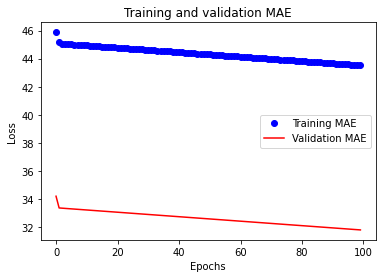

In [ ]:
history_dict = history.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(100)
plt.plot(epochs, mae_values, 'bo', label='Training MAE')
plt.plot(epochs, val_mae_values, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

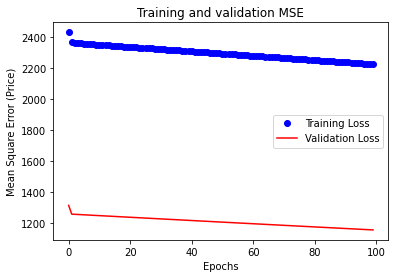

In [ ]:
loss_values = history_dict['loss']
val_mse_values = history_dict['val_mse']
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_mse_values, 'r', label='Validation Loss')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error (Price)')
plt.legend()
plt.show()

# Method 2

In [ ]:
mean=concrete_data.mean(axis=0)
std=concrete_data.std(axis=0)

remaining_data-=mean
remaining_data/=std

test_data-=mean
test_data/=std

In [ ]:
model=models.Sequential()
model.add(layers.Dense(36,activation='relu',input_shape=(8,)))
model.add(layers.Dense(36,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
history=model.fit(train_data,train_labels,epochs=150,batch_size=100,validation_data=(val_data,val_labels))

Epoch 1/150
4/4 [==============================] - 1s 74ms/step - loss: 2374.6984 - mae: 40.8092 - val_loss: 491.9659 - val_mae: 18.3266
Epoch 2/150
4/4 [==============================] - 0s 16ms/step - loss: 963.3757 - mae: 26.1246 - val_loss: 441.9873 - val_mae: 17.5610
Epoch 3/150
4/4 [==============================] - 0s 18ms/step - loss: 759.1994 - mae: 22.7893 - val_loss: 430.9897 - val_mae: 17.4607
Epoch 4/150
4/4 [==============================] - 0s 18ms/step - loss: 513.3028 - mae: 18.7370 - val_loss: 1014.6010 - val_mae: 27.1424
Epoch 5/150
4/4 [==============================] - 0s 18ms/step - loss: 582.0294 - mae: 19.5079 - val_loss: 407.5900 - val_mae: 16.9868
Epoch 6/150
4/4 [==============================] - 0s 18ms/step - loss: 383.7045 - mae: 16.0290 - val_loss: 381.9985 - val_mae: 16.2951
Epoch 7/150
4/4 [==============================] - 0s 17ms/step - loss: 403.7481 - mae: 16.5637 - val_loss: 358.5197 - val_mae: 15.5198
Epoch 8/150
4/4 [=============================

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

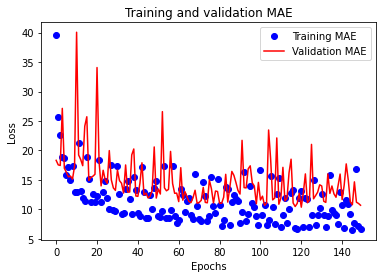

In [ ]:
history_dict = history.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(150)
plt.plot(epochs, mae_values, 'bo', label='Training MAE')
plt.plot(epochs, val_mae_values, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

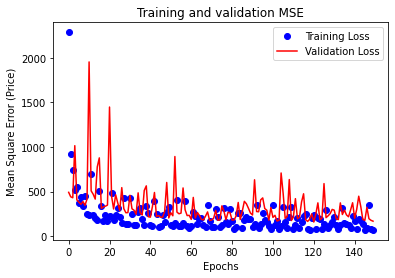

In [ ]:
loss_values = history_dict['loss']
val_mse_values = history_dict['val_loss']
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_mse_values, 'r', label='Validation Loss')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error (Price)')
plt.legend()
plt.show()

# Method 3 (Using Kfold)

In [ ]:
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(36,activation='relu',input_shape=(8,)))
  model.add(layers.Dense(36,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [ ]:
k = 4
num_val_samples = len(remaining_data) // k
num_epochs = 80
all_mae_histories = []
for i in range(k):
 print('processing fold #', i)

 val_data = remaining_data[i * num_val_samples: (i + 1) * num_val_samples]
 val_targets = remaining_labels[i * num_val_samples: (i + 1) * num_val_samples]

 partial_train_data = np.concatenate([remaining_data[:i * num_val_samples],remaining_data[(i + 1) * num_val_samples:]],axis=0)
 partial_train_targets = np.concatenate([remaining_labels[:i * num_val_samples],remaining_labels[(i + 1) * num_val_samples:]],axis=0)
 
 model = build_model()
 history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=5, verbose=0)
 mae_history = history.history['val_mae']
 all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

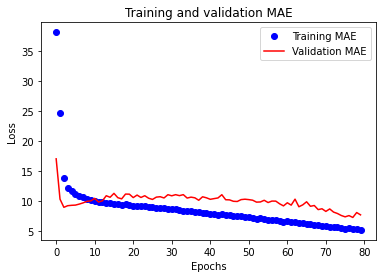

In [ ]:
history_dict = history.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(80)
plt.plot(epochs, mae_values, 'bo', label='Training MAE')
plt.plot(epochs, val_mae_values, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

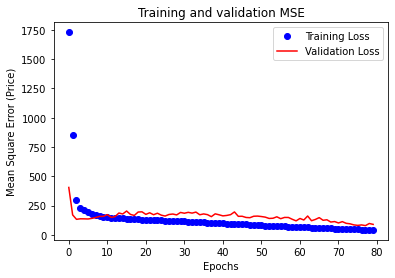

In [ ]:
loss_values = history_dict['loss']
val_mse_values = history_dict['val_loss']
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_mse_values, 'r', label='Validation Loss')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error (Price)')
plt.legend()
plt.show()

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

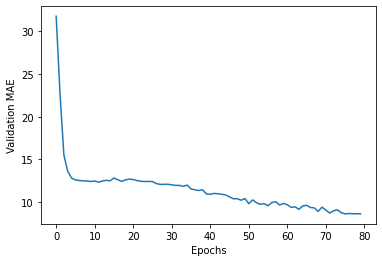

In [ ]:
plt.plot(range(len(average_mae_history)), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 140.2606 - mae: 9.1545


# Method 4 (Improved Results)

### 1.Data Preparation again

In [68]:
x_train = concrete_data.sample(frac = 0.7, random_state = 123)

In [69]:
x_train.index

Int64Index([134,  13, 996, 770, 937,  98, 701, 527, 560, 656,
            ...
            436, 488, 570, 890, 958, 931, 466, 983, 918, 423],
           dtype='int64', length=721)

In [70]:
x_train.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28.0,71.30
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90.0,42.33
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28.0,26.86
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3.0,14.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28.0,36.80


In [71]:
x_test = concrete_data.drop(x_train.index)
x_test.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90.0,38.07
14,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28.0,47.81


In [72]:
y_train = x_train.iloc[:,-1]
x_train = x_train.iloc[:,0:-1]
y_test = x_test.iloc[:,-1]
x_test = x_test.iloc[:,0:-1]

In [73]:
x_mean = x_train.mean()
x_train -= x_mean
x_std = x_train.std()
x_train /= x_std
x_test -= x_mean
x_test /= x_std

In [74]:
y_mean = y_train.mean()
y_train -= y_mean
y_std = y_train.std()
y_train /= y_std
y_test -= y_mean
y_test /= y_std

In [75]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 134 to 423
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               721 non-null    float64
 1   Blast_Furnance_Slag  721 non-null    float64
 2   Fly_Ash              721 non-null    float64
 3   Water                721 non-null    float64
 4   Super_Plasticizer    721 non-null    float64
 5   Coarse_Aggregate     721 non-null    float64
 6   Fine_Aggregate       721 non-null    float64
 7   Age                  721 non-null    float64
dtypes: float64(8)
memory usage: 50.7 KB


In [76]:
x_train.dtypes

Cement                 float64
Blast_Furnance_Slag    float64
Fly_Ash                float64
Water                  float64
Super_Plasticizer      float64
Coarse_Aggregate       float64
Fine_Aggregate         float64
Age                    float64
dtype: object

In [77]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [78]:
x_train

array([[ 0.80545429,  1.30380957, -0.82805958, ..., -0.34868242,
        -0.24128161, -0.28294978],
       [-0.85911335,  1.31526445, -0.82805958, ..., -0.51303507,
        -1.2999464 ,  0.70067422],
       [-1.21980182,  1.87311692, -0.82805958, ...,  0.39025745,
        -1.12843776, -0.28294978],
       ...,
       [-1.37603586,  0.98994597,  1.11404672, ..., -0.63468191,
        -0.13516836, -0.28294978],
       [-1.2930968 , -0.86116202,  1.93535081, ..., -1.91067965,
         1.15546493, -0.28294978],
       [-1.0288491 , -0.7053757 ,  1.8334597 , ...,  0.44849264,
         0.99999668, -0.50505842]])

In [ ]:
y_train

###2.Model definition

In [80]:
from tensorflow.keras import layers
from tensorflow.keras import models
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))

In [81]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [82]:
history = model.fit(x_train, y_train, epochs=200, batch_size=16, validation_split= 0.4)

Epoch 1/200
27/27 [==============================] - 1s 9ms/step - loss: 0.7316 - mae: 0.6966 - val_loss: 0.4807 - val_mae: 0.5707
Epoch 2/200
27/27 [==============================] - 0s 4ms/step - loss: 0.3366 - mae: 0.4645 - val_loss: 0.3687 - val_mae: 0.4929
Epoch 3/200
27/27 [==============================] - 0s 4ms/step - loss: 0.2416 - mae: 0.3994 - val_loss: 0.2919 - val_mae: 0.4210
Epoch 4/200
27/27 [==============================] - 0s 4ms/step - loss: 0.2041 - mae: 0.3614 - val_loss: 0.2751 - val_mae: 0.4077
Epoch 5/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1861 - mae: 0.3486 - val_loss: 0.2673 - val_mae: 0.3940
Epoch 6/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1862 - mae: 0.3348 - val_loss: 0.2320 - val_mae: 0.3653
Epoch 7/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1440 - mae: 0.2930 - val_loss: 0.2055 - val_mae: 0.3487
Epoch 8/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1122 - m

In [83]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

### 3.Results

In [84]:
results= model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.1216 - mae: 0.2365


### 4.Plotting the validation scores

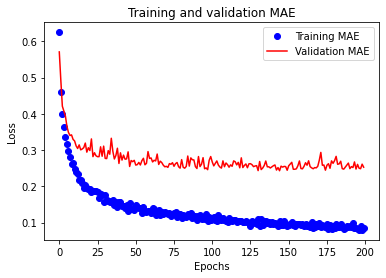

In [85]:
history_dict = history.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(200)
plt.plot(epochs, mae_values, 'bo', label='Training MAE')
plt.plot(epochs, val_mae_values, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

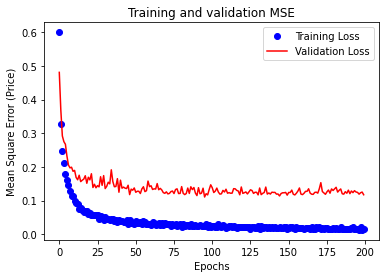

In [86]:
loss_values = history_dict['loss']
val_mse_values = history_dict['val_loss']
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_mse_values, 'r', label='Validation Loss')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error (Price)')
plt.legend()
plt.show()

### 5.Evaluation and Prediction 

In [89]:
y_pred = model.predict(x_test)

In [94]:
y_pred[0]

array([0.17409028], dtype=float32)

In [96]:
y_test[0]

0.2701068049063647

**<h4 align="right"> AIC Deep Learning Assignment Submitted by : PIAIC101499 </h4>**


